# 9. Stochastic Methods: Exercise

Name: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Integration

When an explicit function like $x_n = g(x_1,...,x_{n-1})$ is not available, you can use a binary function that takes 1 within and 0 outside of a region to measure its volume.

1) Measure the volume of an n-dimensional sphere using a binary function
$$ f(x) = \left\{ \begin{array}{ccc}
    1 & \mbox{if} & \sum_{i=1}^n x_i^2 \le 1 \\
    0 & \mbox{otherwise} & \end{array}\right. $$

2) Measure the area or volume of a shape of your interest by sampling method.

## 2. Rejection Sampling
Let us generate samples from Gamma distribution 
$$ p(x; k, \theta) = \frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}} $$
with the shape parameter $k>0$ and the scaling parameter $\theta$ using the gamma function $\Gamma(k)$ available in `scipy.special`.

In [2]:
from scipy.special import gamma
from scipy.special import factorial

Here is how the gamma function looks like, together with factorial at integer values.

Text(0, 0.5, 'f(x)')

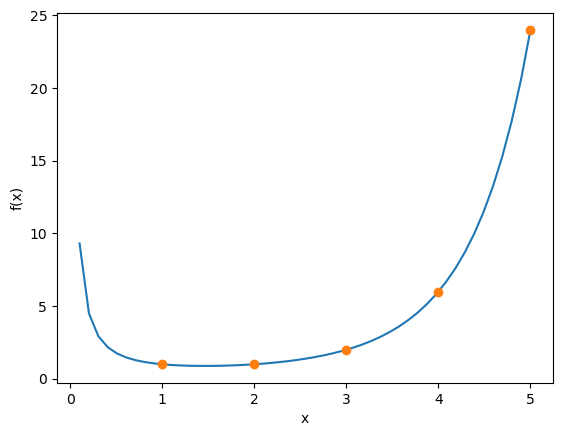

In [3]:
kmax = 5
x = np.linspace(0, kmax, 50)
plt.plot(x, gamma(x))
plt.plot(range(1,kmax+1), [factorial(k-1) for k in range(1,kmax+1)], 'o')
plt.xlabel("x"); plt.ylabel("f(x)")

1) Define the Gamma density function with arbitrary $k$ and $\theta$.

In [4]:
def p_gamma(x, k=1, theta=1):
    """density function of gamma distribution"""
    
    return 

Consider the exponential distribution $q(x;\mu)=\frac{1}{\mu}e^{-\frac{x}{\mu}}$ as the proposal distribution.  

In [5]:
def p_exp(x, mu=1):
    """density function of exponential distribution"""
    return 

def x_exp(n=1, mu=1):
    """sample from exponential distribution"""
    y = np.random.random(n)  # uniform in [0,1]
    return 

The ratio of the target and proposal distributions is
$$ \frac{p(x;k,\theta)}{q(x;\mu)} = \frac{\mu}{\Gamma(k)\theta^k}x^{k-1}e^{(\frac{1}{\mu}-\frac{1}{\theta})x}. $$
By setting
$$ \frac{d}{dx}\frac{p(x;k,\theta)}{q(x;\mu)} = 0 $$
we have
$$ \{(k-1)x^{k-2}+(\frac{1}{\mu}-\frac{1}{\theta})x^{k-1}\}e^{(\frac{1}{\mu}-\frac{1}{\theta})x} = 0. $$
Thus at
$$ x = \frac{(k-1)\mu\theta}{\mu-\theta} $$
the ratio $\frac{p(x;k,\theta)}{q(x;\mu)}$ takes the maximum
$$ \frac{\mu^k}{\Gamma(k)\theta}\left(\frac{k-1}{\mu-\theta}\right)^{k-1}e^{1-k}. $$
2) What is a good choice of $\mu$ to satisfy  $p(x)\le cq(x)$ and what is the value of $c$ for that?

By setting $\mu=k\theta$, we have $p(x)\le cq(x)$ with
$c=\frac{k^k}{\Gamma(k)}e^{1-k}$

3) Verify that $cq(x)$ covers $p(x)$ by plotting them for some $k$ and $\theta$.

ValueError: x, y, and format string must not be None

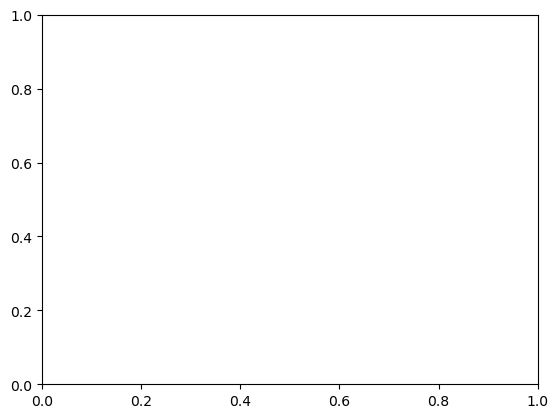

In [6]:
k = 2
theta = 2
c = (k**k)/gamma(k)*np.exp(1-k)
x = np.linspace(0, 10, 50)
plt.plot(x, p_gamma(x, k, theta))
plt.plot(x, c*p_exp(x, k*theta))
plt.xlabel("x");

4) Implement a function to general samples from Gamma distribution with arbitorary $k$ and $\theta$ using rejection sampling from exponential distribution.

In [ ]:
def x_gamma(n=1, k=1, theta=1):
    """sample from gamma distribution by rejection sampling"""
    c = (k**k)/gamma(k)*np.exp(1-k)
    #print("c =", c)
    xe = x_exp(n, k*theta)
    paccept = 
    accept = np.random.random(n)<paccept
    xg = xe[accept]  # rejection sampling
    #print("accept rate =", len(xg)/n)
    return(xg)

In [ ]:
k = 2
theta = 2
# sample histogram
xs = x_gamma(1000, k, theta)
plt.hist(xs, bins=20, density=True)
# compare with the density function
x = np.linspace(0, 10, 100)
plt.plot(x, p_gamma(x, k, theta))
plt.xlabel("")

## 3. Importance Sampling
You have $m$ sample values $f(x_i)$ $(i=1,...m)$ at $x_i$ following a normal distribution 
$$ q(x;\mu_0,\sigma_0) = \frac{1}{\sqrt{2\pi \sigma_0^2}}e^{-\frac{(x-\mu_0)^2}{2\sigma_0^2}}. $$

Consider estimating the mean of $f(x)$ for samples with a different normal distribution $p(x;\mu_1, \sigma_1)$ by importance sampling
$$ E_p[h(x)] = E_q\left[\frac{p(x)}{q(x)}h(x)\right] $$

1) What is the importance weight $\frac{p(x)}{q(x)}$?

2) Let us consider the simplest case of $f(x)=x$. 

Generate $m=100$ samples with $\mu_0=100$ and $\sigma_0=20$ and take the sample mean $E_q[f(x)]$.

In [ ]:
m = 100
mu0 = 100
sig0 = 20
xs = 
# show histogram
plt.hist(xs, bins=20, density=True)
plt.xlabel("x")
# check the sample mean
np.mean(xs)

3) Estimate the mean $E_p[f(x)]$ for $\mu_1=120$ and $\sigma_1=10$ by importance sampling.

In [ ]:
mu1 = 120
sig1 = 20
importance = 
mean1 = np.dot(importance, xs)/m
print(mean1)

4) See how the result changes with different settings of $\mu_1$, $\sigma_1$ and sample size $m$.

Optional) Try with a different function $f(x)$.

## 4. MCMC

Try applying Metropolis sampling to your own (unnormalized) distribution.